In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [119]:
df_train = pd.read_csv("dataset/train.csv")
df_test_X = pd.read_csv("dataset/test.csv")
df_test_y = pd.read_csv("dataset/gender_submission.csv")

In [120]:
df_train.columns, df_test_X.columns, df_test_y.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Survived'], dtype='object'))

Concatenate all dfs to dataset

In [121]:
df_test = df_test_X.merge(df_test_y, how="inner", on="PassengerId")
df = df_train.merge(df_test, "outer")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


clean dataset

In [122]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.377387,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.484918,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


- PassengerId - clean
- Survived - clean
- Pclass - clean
- Name - two names are filled twice
- Sex - clean
- Age - some values aren't filled
- SibSp - clean
- Parch - clean
- Ticket - clean
- Fare - one value isn't filled
- Cabin - most of the values aren't filled
- Embarked - 2 values aren't filled

question is how to handle the values.
- mode/average/random with same distribution
- ml prediction
- delete rows
- find extend information

In [123]:
df_clean = df.copy()

### Name

In [124]:
df[df["Name"].duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
897,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [125]:
df[df["Name"] == "Connolly, Miss. Kate"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
897,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [126]:
df[df["Name"] == "Kelly, Mr. James"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
891,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


both seems ok

### Age

use ml prediction to fill age values

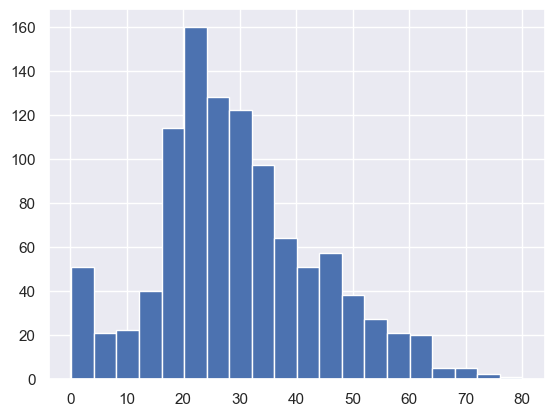

In [143]:
plt.hist(df["Age"], bins=20)
plt.show()

In [127]:
from sklearn.ensemble import RandomForestRegressor

df_clean['Sex_encoded'] = df_clean['Sex'].astype('category').cat.codes

features = ['Pclass', 'Sex_encoded', 'SibSp', 'Parch', 'Fare']
age_model = RandomForestRegressor()

age_train = df_clean.dropna()
age_model.fit(age_train[features], age_train['Age'])

age_missing = df_clean[df_clean['Age'].isnull()]
predicted_ages = age_model.predict(age_missing[features])

df_clean.loc[df_clean['Age'].isnull(), 'Age'] = predicted_ages

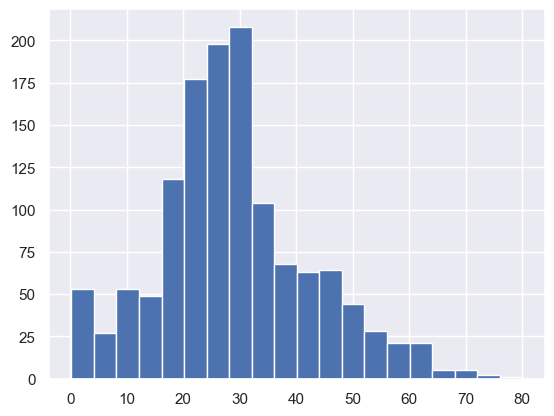

In [145]:
plt.hist(df_clean["Age"], bins=20)
plt.show()

distribution is not quite same but i think it is better than using mean

### Fare

fill unknown fare with mean

In [128]:
df_clean[df_clean["Fare"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
1043,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,1


In [138]:
df_clean.loc[df_clean["Fare"].isnull(), "Fare"] = df_clean["Fare"].mean()
df_clean[df_clean["PassengerId"] == 1044]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_encoded
1043,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,33.295479,S,1


### Cabin

there are lot of missing values, and also there will be people without cabin, so from my perspective, this column is useless. drop it

In [130]:
df_clean = df_clean.drop(["Cabin"], axis=1)

### Embarked

according to information from titanic encyclopedia, both were embarked in S

but lets try the ml prediction

In [131]:
df_clean[df_clean["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_encoded
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,0


In [132]:
from sklearn.ensemble import RandomForestClassifier

features = ['Pclass', 'Fare', 'SibSp', 'Parch', 'Sex_encoded', 'Age']
X = df_clean.dropna()[features]
y = df_clean.dropna()['Embarked']

model = RandomForestClassifier()
model.fit(X, y)

missing_embarked = df_clean[df_clean['Embarked'].isnull()]

predicted_values = model.predict(missing_embarked[features])
predicted_values

array(['C', 'C'], dtype=object)

as you can see, the prediction didn't go well. for this case, it would be better to just use the mode value

In [133]:
df_clean.loc[df_clean['Embarked'].isnull(), 'Embarked'] = df_clean["Embarked"].mode()

### Final dataset

input dataset

In [146]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [134]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


clean dataset

In [147]:
df_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,30.219262,0,0,A.5. 3236,8.0500,S,1
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,0
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,1
1307,1308,0,3,"Ware, Mr. Frederick",male,30.219262,0,0,359309,8.0500,S,1


In [135]:
df_clean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.377387,2.294882,29.218436,0.498854,0.385027,33.295479,0.644003
std,378.020061,0.484918,0.837836,13.718118,1.041658,0.865560,51.738879,0.478997
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.041667,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,36.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000
